#  Исследование результатов А/В-теста и поиск инсайтов
- **Автор:** Алиса Гизова
- **Дата:** 30.12.2025

В проекте анализируется международное мобильное приложение для онлайн-торговли финансовыми активами. Пользователи могут инвестировать деньги в акции, валюту, криптовалюту, биржевые фонды (ETF) и другие активы. Целевая аудитория приложения — начинающие инвесторы. Получить доступ к финансовым рынкам можно со смартфона либо через веб-версию. 

Приложение ориентировано на рынок Латинской Америки с акцентом на четыре страны: Мексику, Бразилию, Колумбию и Аргентину — там быстро растёт интерес к финтеху и инвестициям, а экономики очень разные. 

Появилась гипотеза о недостаточной финансовой грамотности пользователей: они не понимают, как работать с активами разной степени риска. Клиенты покупают активы с высоким риском и теряют деньги, что снижает вовлечённость.
Команда продукта решила обновить онбординг пользователей и добавить в него детальную информацию о различиях финансовых активов и связанных с ними рисках. Однако появилось опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений. 

Чтобы разобраться, команда решила провести A/B-эксперимент. 

### А/В-эксперимент

В эксперименте участвовали новые пользователи, которые зарегистрировались в приложении со 2 по 15 июня 2025 года. 
Пользователей случайным образом разделили на две равные группы: 
- Контрольная группа проходила стандартный онбординг без обязательного обучения.
- Тестовая группа проходила обновлённый онбординг с подробной информацией об активах и связанных с ними рисках. 

После разделения активность пользователей анализировали в течение недели.

Цель эксперимента — оценить, как обновлённый онбординг влияет на поведение пользователей и их дальнейшую инвестиционную активность.

При внедрении новой фичи команда продукта выдвинула такие гипотезы:
- Гипотеза роста: обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- Гипотеза риска: информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- Дополнительная гипотеза: после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита. 

Чтобы увидеть полную картину, недостаточно следить за метриками конверсии. Команда выбрала для эксперимента такой набор метрик: 
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Ожидалось, что ключевая и барьерная метрики не упадут, а вспомогательные покажут значительный рост. 

**Цель:** Провести полный анализ результатов А/В-эксперимента.

**Задачи:**
- Анализ исторических данных.
- Анализ данных А/В-теста.

### План проекта
1. Загрузка исторических данных и их предобработка
2. Исследовательский анализ исторических данных
3. Исследование результатов А/В эксперимента
4. Анализ изменений суммы депозитов на платящего пользователя
5. Выводы

---

## Часть 1

### Загрузка исторических данных и их предобработка

In [3]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [5]:
# Выводим первые строки датафрейма на экран
hist_df.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       238059 non-null  object        
 1   country_code  238059 non-null  object        
 2   platform      238059 non-null  object        
 3   first_ts      238059 non-null  datetime64[ns]
 4   first_dt      238059 non-null  datetime64[ns]
 5   event_ts      238059 non-null  datetime64[ns]
 6   event_name    238059 non-null  object        
 7   amount        33093 non-null   float64       
 8   asset         15392 non-null   object        
 9   risk_level    15392 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 18.2+ MB


---

Датасет `pa_sollmafin_hist.csv` содержит 10 столбцов и 238059 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`float64`) и строковые значения (`object`). Значения в столбцах `first_ts`, `first_dt` и `event_ts` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет содержит пропуски в столбцах `amount`, `asset`, `risk_level`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [8]:
# Проверяем полные дубликаты в датафрейме
hist_df.duplicated().sum()

0

In [9]:
# Проверяем неявные дубликаты в датафрейме
hist_df.duplicated(subset=['user_id','event_name','event_ts']).sum()

0

В датафрейме нет дубликатов строк.

In [11]:
# Проверим уникальные значения в некоторых столбцах
for column in ['country_code','platform','event_name','asset','risk_level']:
    sets = set(hist_df[column])
    display(f'{column}:{sets}')

"country_code:{'MX', 'AR', 'BR', 'CO'}"

"platform:{'web', 'mobile'}"

"event_name:{'install / open_web', 'first_deposit', 'main_page', 'onboarding_complete', 'second_deposit', 'registration', 'introduction', 'asset_purchase'}"

"asset:{'stock', nan, 'crypto', 'option'}"

"risk_level:{'low', 'medium', nan, 'high'}"

---

### Исследовательский анализ исторических данных

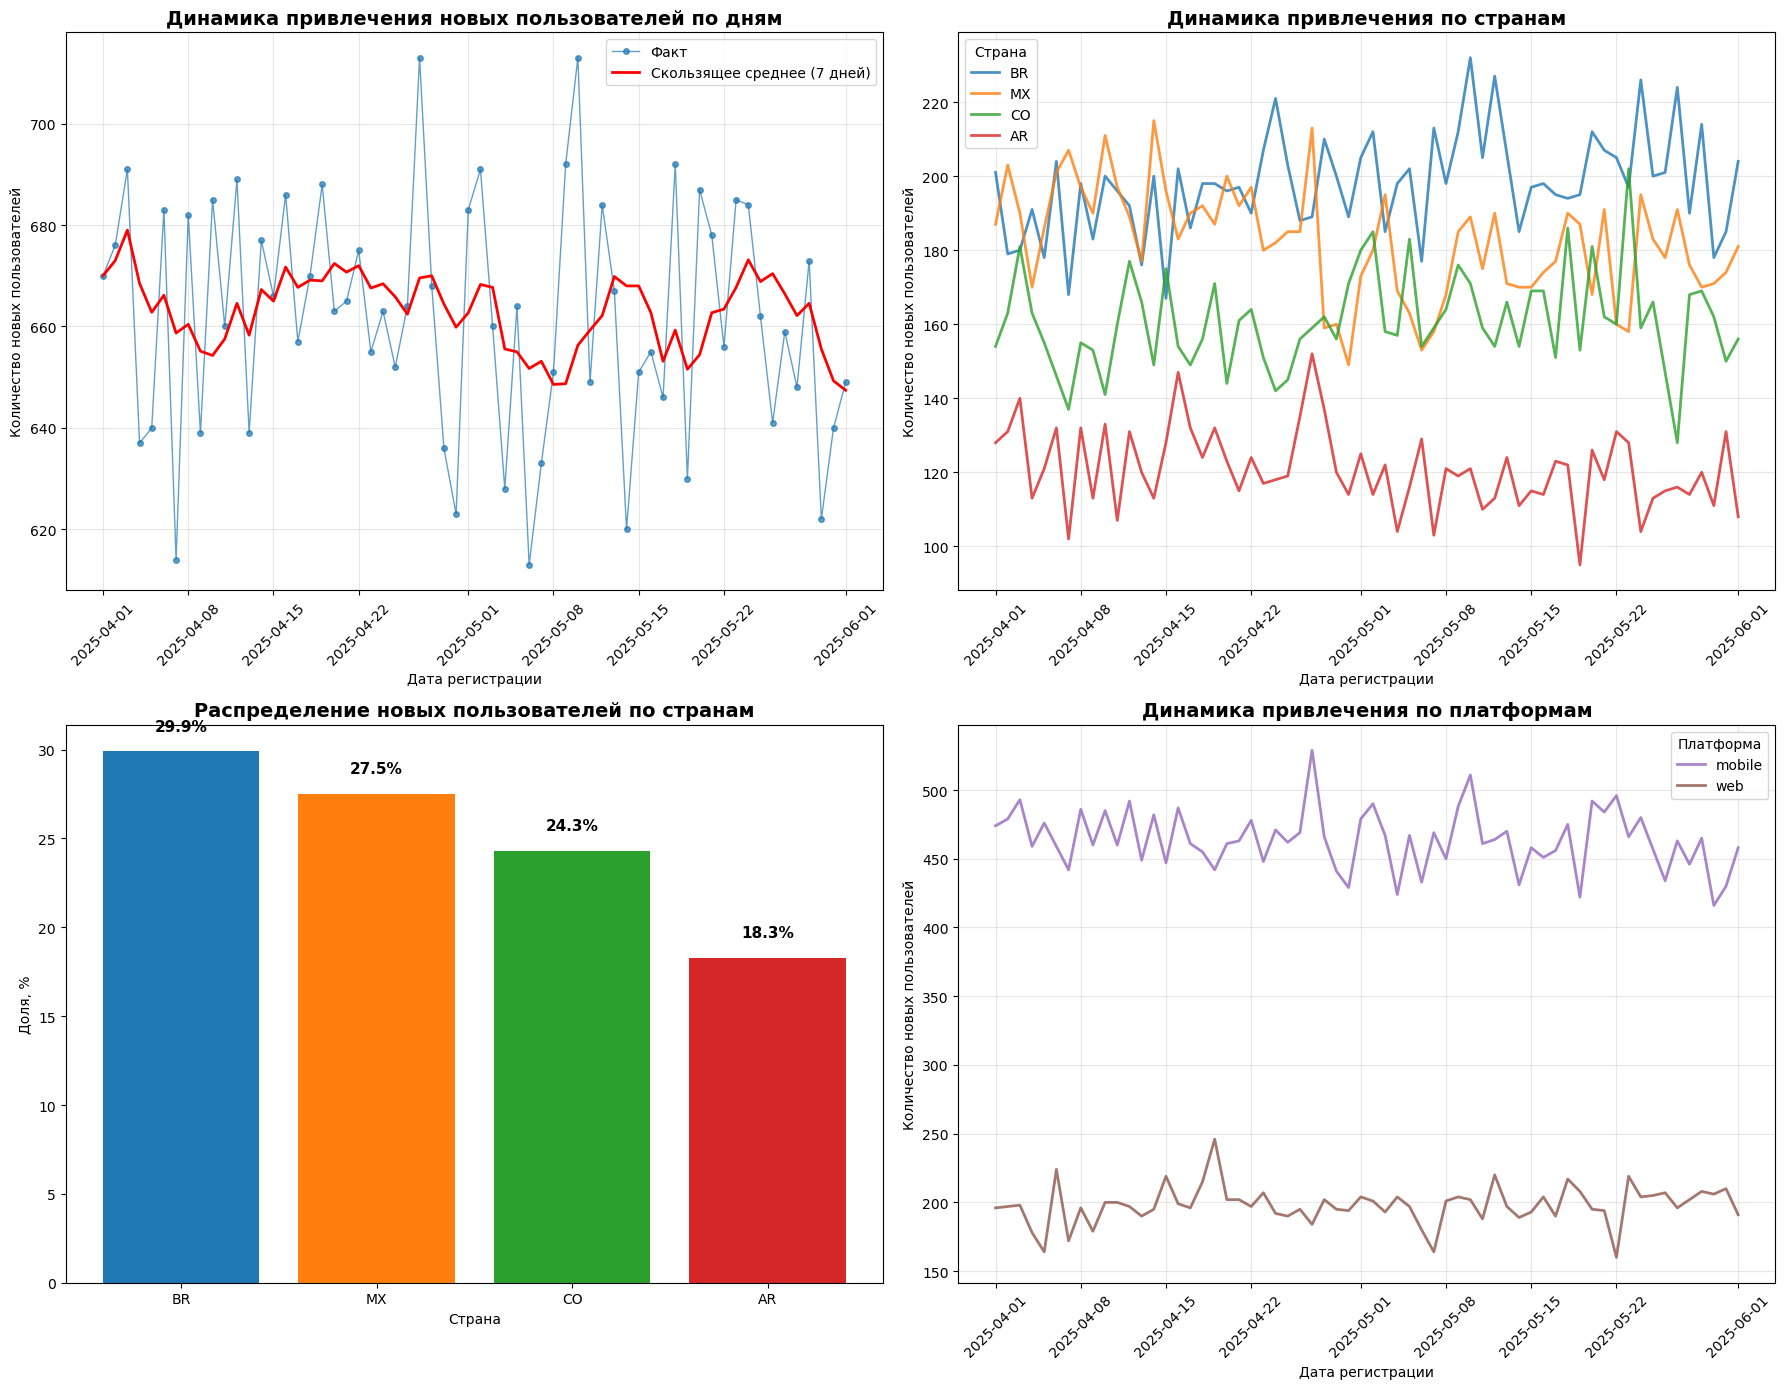


Базовые статистики по привлечению (по дням):
count     62.000000
mean     661.806452
std       23.425388
min      613.000000
25%      646.500000
50%      663.000000
75%      682.750000
max      713.000000
Name: new_users, dtype: float64

Анализ по странам:
   BR: 12,266 пользователей (29.9%)
   MX: 11,303 пользователей (27.5%)
   CO: 9,974 пользователей (24.3%)
   AR: 7,489 пользователей (18.3%)

Анализ по платформам:
   mobile: 28,758 пользователей (70.1%)
   web: 12,274 пользователей (29.9%)


In [13]:
# Создаем отдельный датафрейм с уникальными пользователями (первая запись каждого пользователя)
df_users = hist_df.drop_duplicates(subset=['user_id']).copy()

# Добавляем дополнительные временные признаки
df_users['reg_date'] = df_users['first_dt']
# Группировка по дням
daily_registrations = df_users.groupby('reg_date').agg({
    'user_id': 'nunique',
    'country_code': lambda x: x.value_counts().to_dict(),
    'platform': lambda x: x.value_counts().to_dict()
}).reset_index()

daily_registrations.columns = ['reg_date', 'new_users', 'country_dist', 'platform_dist']

# Добавляем скользящее среднее для сглаживания графика
daily_registrations['ma_7'] = daily_registrations['new_users'].rolling(window=7, min_periods=1).mean()

# Группировка по странам
country_daily = pd.crosstab(df_users['reg_date'], df_users['country_code'])
country_daily = country_daily.reset_index()

# Группировка по платформам
platform_daily = pd.crosstab(df_users['reg_date'], df_users['platform'])
platform_daily = platform_daily.reset_index()

fig = plt.figure(figsize=(18, 14))

# ОБЩАЯ ДИНАМИКА ПО ДНЯМ (с разметкой периода A/B-теста)
ax1 = plt.subplot(2, 2, 1)
ax1.plot(daily_registrations['reg_date'], daily_registrations['new_users'], 
         marker='o', markersize=4, linewidth=1, alpha=0.7, label='Факт')
ax1.plot(daily_registrations['reg_date'], daily_registrations['ma_7'], 
         linewidth=2, color='red', label='Скользящее среднее (7 дней)')

ax1.set_title('Динамика привлечения новых пользователей по дням', fontsize=14, fontweight='bold')
ax1.set_xlabel('Дата регистрации')
ax1.set_ylabel('Количество новых пользователей')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# ДИНАМИКА ПО СТРАНАМ
ax2 = plt.subplot(2, 2, 2)
countries = ['BR', 'MX', 'CO', 'AR']
country_colors = {'BR': '#1f77b4', 'MX': '#ff7f0e', 'CO': '#2ca02c', 'AR': '#d62728'}

for country in countries:
    if country in country_daily.columns:
        ax2.plot(country_daily['reg_date'], country_daily[country], 
                 label=country, linewidth=2, alpha=0.8, color=country_colors.get(country))

ax2.set_title('Динамика привлечения по странам', fontsize=14, fontweight='bold')
ax2.set_xlabel('Дата регистрации')
ax2.set_ylabel('Количество новых пользователей')
ax2.legend(title='Страна')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# ДОЛЯ СТРАН В ПРИВЛЕЧЕНИИ
ax3 = plt.subplot(2, 2, 3)
country_totals = df_users['country_code'].value_counts()
country_percentages = (country_totals / country_totals.sum() * 100).round(1)

bars3 = ax3.bar(country_percentages.index, country_percentages.values, 
                color=[country_colors.get(c, '#666666') for c in country_percentages.index])
ax3.set_title('Распределение новых пользователей по странам', fontsize=14, fontweight='bold')
ax3.set_xlabel('Страна')
ax3.set_ylabel('Доля, %')

# Подписываем проценты на столбцах
for bar, percentage in zip(bars3, country_percentages.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{percentage}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# ДИНАМИКА ПО ПЛАТФОРМАМ
ax4 = plt.subplot(2, 2, 4)
platforms = ['mobile', 'web']
platform_colors = {'mobile': '#9467bd', 'web': '#8c564b'}

for platform in platforms:
    if platform in platform_daily.columns:
        ax4.plot(platform_daily['reg_date'], platform_daily[platform], 
                 label=platform, linewidth=2, alpha=0.8, color=platform_colors.get(platform))

ax4.set_title('Динамика привлечения по платформам', fontsize=14, fontweight='bold')
ax4.set_xlabel('Дата регистрации')
ax4.set_ylabel('Количество новых пользователей')
ax4.legend(title='Платформа')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Базовые статистики
print("\nБазовые статистики по привлечению (по дням):")
stats = daily_registrations['new_users'].describe()
print(stats)

# Анализ по странам
print(f"\nАнализ по странам:")
for country in countries:
    if country in df_users['country_code'].value_counts().index:
        count = df_users['country_code'].value_counts()[country]
        percentage = count / len(df_users) * 100
        print(f"   {country}: {count:,} пользователей ({percentage:.1f}%)")

# Анализ по платформам
print(f"\nАнализ по платформам:")
for platform in platforms:
    if platform in df_users['platform'].value_counts().index:
        count = df_users['platform'].value_counts()[platform]
        percentage = count / len(df_users) * 100
        print(f"   {platform}: {count:,} пользователей ({percentage:.1f}%)")

**Промежуточный вывод:**
- Привлечение новых пользователей стабильно высокое (в среднем ~662 в день) с небольшой сезонной волатильностью, что указывает на устойчивый интерес к приложению.
- Основная аудитория — это пользователи из Бразилии и Мексики (более 57% от общего числа), что подчеркивает их стратегическую важность.
- Подавляющее большинство пользователей (70%) предпочитают мобильную версию, что требует фокусировки UX-оптимизации именно на смартфонах.

Это обосновывает необходимость адаптации онбординга под мобильный опыт и локализацию под ключевые рынки.

**Анализ воронок событий**

Предполагается, что пользователь проходит такой путь:
1. `install / open_web` — запуск приложения или web-страницы
2. `introduction` — приветственная страница
3. `registration` — окончание регистрации
4. `main_page` — загрузка основной страницы приложения
5. `onboarding_complete` — завершение онбординга
6. `first_deposit` — первое пополнение брокерского счёта
7. `asset_purchase` — покупка актива
8. `second_deposit` — второе пополнение брокерского счёта. 

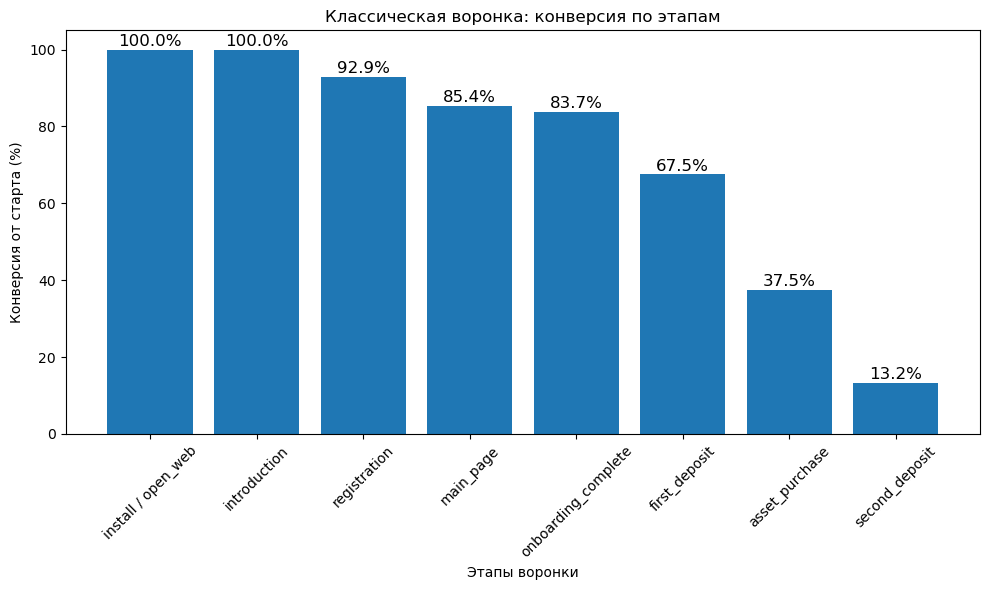

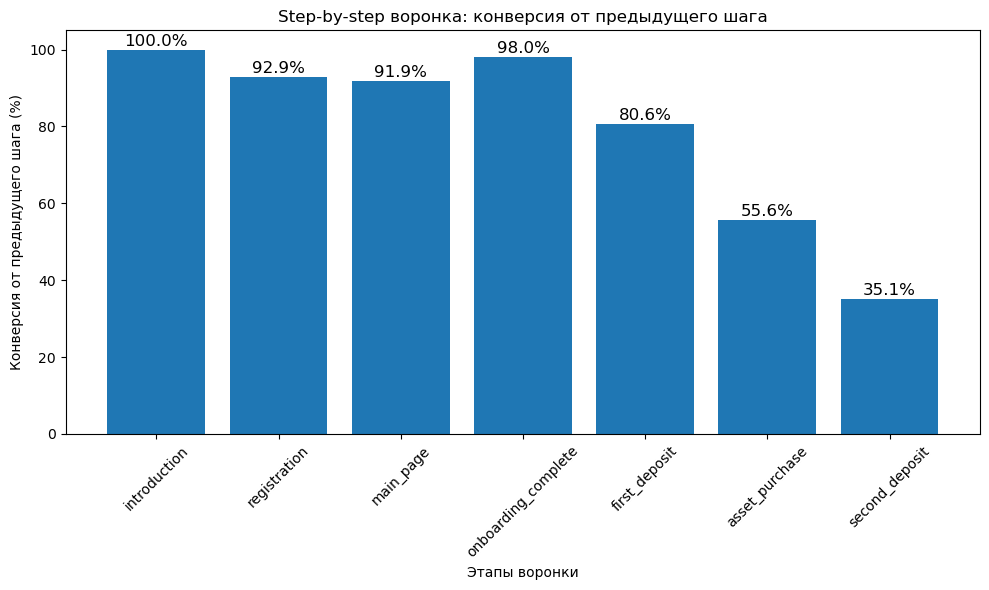

In [17]:
# Задаём порядок шагов в воронке
funnel_steps = ['install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit',
                'asset_purchase', 'second_deposit']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = hist_df[hist_df['event_name'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Добавляем конверсии
funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))

# Фильтруем данные, убирая NaN
valid_data = funnel_df[~funnel_df['conversion_from_first_%'].isna()]

# Строим barplot только с валидными данными
plt.bar(valid_data['step'], valid_data['conversion_from_first_%'])

# Перебираем в цикле значения конверсии
for index, value in enumerate(valid_data['conversion_from_first_%']):
    # Проверяем, что значение конечно (не NaN и не бесконечность)
    if pd.notna(value) and np.isfinite(value):
        plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Классическая воронка: конверсия по этапам')
plt.ylabel('Конверсия от старта (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))

# Фильтруем данные, убирая NaN для второго графика
valid_data_prev = funnel_df[~funnel_df['conversion_from_previous_%'].isna()]

# Строим barplot
plt.bar(valid_data_prev['step'], valid_data_prev['conversion_from_previous_%'])

# Перебираем в цикле значения конверсии
for index, value in enumerate(valid_data_prev['conversion_from_previous_%']):
    # Проверяем, что значение конечно
    if pd.notna(value) and np.isfinite(value):
        plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

Пользовательский путь начинается с высокой конверсии на ранних этапах (регистрация → онбординг), но резко падает на ключевых финансовых шагах: только 55,6% пользователей, сделавших первый депозит, переходят к покупке активов, а лишь 35,1% из них открывают второй депозит. Это указывает на два критических узких места:

- Переход от депозита к первой покупке — вероятно, из-за нехватки понимания рисков или сложности выбора актива.
- Возвращение для второго депозита — низкая лояльность после первого опыта.

Это подтверждает гипотезу о недостаточной финансовой грамотности и обосновывает необходимость улучшения онбординга для повышения доверия и повторной активности.

**Влияние уровня риска актива на открытие второго депозита.**

In [20]:
# Выделим id пользователей, которые купили актив (совершили шаг asset_purchase)
users = hist_df[hist_df['event_name']=='asset_purchase'][['user_id','risk_level']]

# Разделим данные по уровням риска
low_risk_users = users[users['risk_level']=='low']['user_id']
medium_risk_users = users[users['risk_level']=='medium']['user_id']
high_risk_users = users[users['risk_level']=='high']['user_id']

# Шаги воронки
funnel_steps = ['asset_purchase', 'second_deposit']

# Фильтруем датасет для low_risk
counts_low = hist_df[(hist_df['event_name'].isin(funnel_steps)) & 
                     (hist_df['user_id'].isin(low_risk_users))]
# Считаем количество клиентов на каждом шаге
counts_low_agg = counts_low.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)
# Считаем конверсию для low
low_funnel = round(counts_low_agg / counts_low_agg.shift(1) * 100, 1)

# Повторяем для medium
counts_medium = hist_df[(hist_df['event_name'].isin(funnel_steps)) & 
                        (hist_df['user_id'].isin(medium_risk_users))]
counts_medium_agg = counts_medium.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)
medium_funnel = round(counts_medium_agg / counts_medium_agg.shift(1) * 100, 1)

# Повторяем для high
counts_high = hist_df[(hist_df['event_name'].isin(funnel_steps)) & 
                      (hist_df['user_id'].isin(high_risk_users))]
counts_high_agg = counts_high.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)
high_funnel = round(counts_high_agg / counts_high_agg.shift(1) * 100, 1)

# Собираем датафрейм
funnel_compare = pd.DataFrame({
    'step': funnel_steps[1:],
    'low_risk': low_funnel[1:].values,
    'medium_risk': medium_funnel[1:].values,
    'high_risk': high_funnel[1:].values
})

display(funnel_compare)

,step,low_risk,medium_risk,high_risk
0,second_deposit,46.4,43.0,26.4


**Промежуточный вывод:**

Пользователи, начавшие с низкорисковых активов, значительно чаще возвращаются для второго депозита (46,4%), чем те, кто выбрал средний (43,0%) или высокорисковые активы (26,4%). 

Это подтверждает гипотезу: новички, столкнувшиеся с потерями после покупки высокорисковых активов без понимания последствий, уходят из приложения. 

Новый онбординг должен не просто предупреждать о рисках, а помогать пользователям осознанно выбирать уровень риска, чтобы сохранить их воронку и повысить повторную конверсию.

**Анализ ключевой метрики на исторических данных**

среднее значение: 91.56 , стандартное отклонение: 80.39


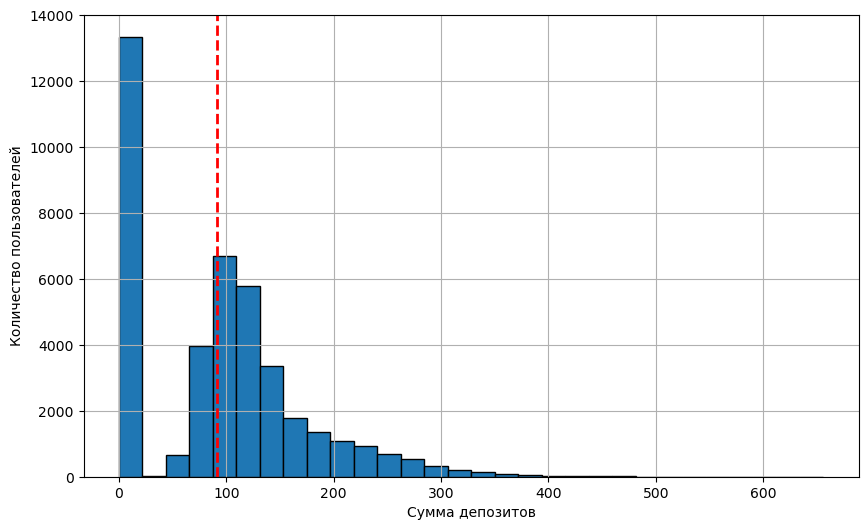

In [23]:
df_groupped = hist_df.groupby('user_id', as_index=False)['amount'].sum()

# посчитаем среднее значение с округлением до 2 знаков после запятой
amount_mean = round(df_groupped.amount.mean(), 2)
# посчитаем стандартное отклонение с округлением до 2 знаков после запятой
amount_std = round(df_groupped.amount.std(), 2)
print(f'среднее значение: {amount_mean} , стандартное отклонение: {amount_std}')


# строим гистограмму для обнаружения выбросов
plt.figure(figsize=(10, 6))
plt.hist(df_groupped['amount'], bins=30, edgecolor='k')
plt.axvline(amount_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее = {amount_mean}')
plt.xlabel('Сумма депозитов')
plt.ylabel('Количество пользователей')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

На гистограмме заметно, что данные сильно смещены влево.
На таком графике понять ситуацию довольно проблематично, поэтому построим boxplot график.

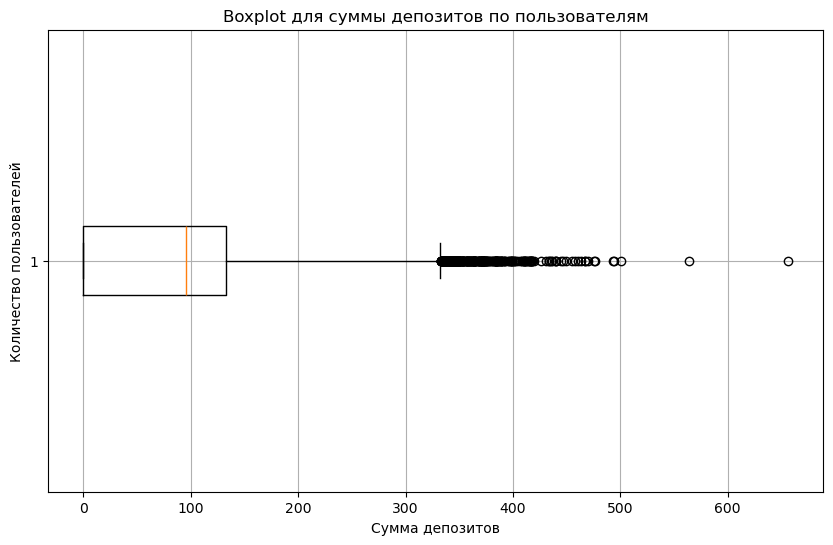

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_groupped['amount'], vert=False)
plt.xlabel('Сумма депозитов')
plt.title('Boxplot для суммы депозитов по пользователям')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

Теперь наличие выбросов становится более наглядным: пользователи с суммой депозитов на более чем 400 у.е. выбиваются из основного распределения. Потому удалим значения выше 99 процентиля и снова посчитаем среднее и стандартное отклонение.

среднее значение: 88.88 , стандартное отклонение: 76.09


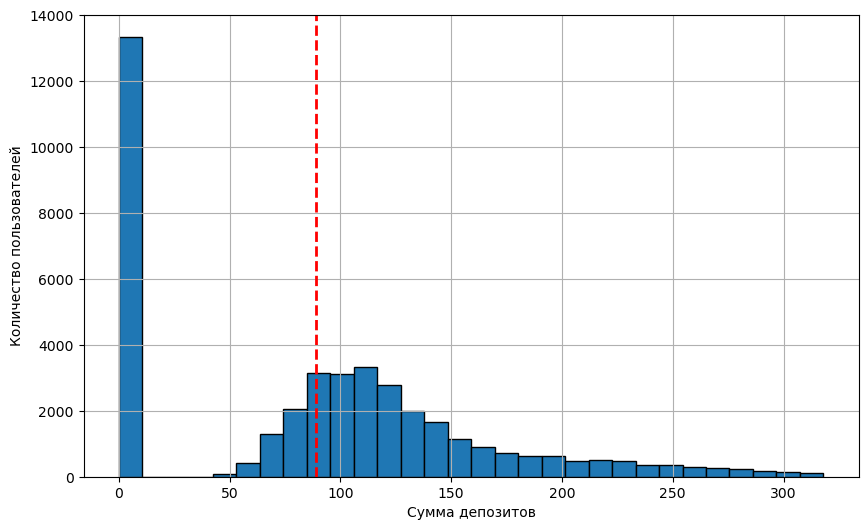

In [27]:
# определим 99 процентиль, с помощью функции quantile
percentile_99 = df_groupped['amount'].quantile(0.99)


# отфильтруем данные, чтобы оставить только те записи, где 'amount' меньше 99-го процентиля
df_capped = df_groupped[df_groupped['amount'] <= percentile_99]

# посчитаем среднее значение с округлением до 2 знаков после запятой
amount_mean = round(df_capped.amount.mean(), 2)
# посчитаем стандартное отклонение с округлением до 2 знаков после запятой
amount_std = round(df_capped.amount.std(), 2)
print(f'среднее значение: {amount_mean} , стандартное отклонение: {amount_std}')

# строим гистограмму для обнаружения выбросов
plt.figure(figsize=(10, 6))
plt.hist(df_capped['amount'], bins=30, edgecolor='k')
plt.axvline(amount_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее = {amount_mean}')
plt.xlabel('Сумма депозитов')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

Удалив выбросы, мы оказали не очень большое влияние на среднее значение, но при этом сократили стандартное отклонение.

**Промежуточный вывод:**

Средняя сумма депозитов на пользователя составляет 88.88, но распределение крайне скошено: подавляющее большинство пользователей вносят небольшие суммы (до 150), а значительная часть — вообще не пополняет баланс (столбец «0»). 

Это говорит о низкой монетизации среди новичков и высокой доле "неплатящих" пользователей. Новый онбординг должен не только повышать конверсию в депозит, но и влиять на размер первоначального вложения — возможно, через рекомендации или геймификацию, чтобы сдвинуть среднее значение вверх и уменьшить долю нулевых депозитов.

---

## Часть 2

### Исследование результатов А/В эксперимента


In [31]:
# Выводим первые строки датафрейма на экран
abt_df.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN


In [32]:
# Выводим информацию о датафрейме
abt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       54805 non-null  object        
 1   country_code  54805 non-null  object        
 2   platform      54805 non-null  object        
 3   first_ts      54805 non-null  datetime64[ns]
 4   first_dt      54805 non-null  datetime64[ns]
 5   event_ts      54805 non-null  datetime64[ns]
 6   event_name    54805 non-null  object        
 7   ab_test       54805 non-null  object        
 8   group         54805 non-null  object        
 9   amount        7843 non-null   float64       
 10  asset         3750 non-null   object        
 11  risk_level    3750 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 5.0+ MB


---

Датасет `pa_sollmafin_abt.csv` содержит 12 столбцов и 54805 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`float64`) и строковые значения (`object`). Значения в столбцах `first_ts`, `first_dt` и `event_ts` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет содержит пропуски в столбцах `amount`, `asset`, `risk_level`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [34]:
# Проверяем полные дубликаты в датафрейме
abt_df.duplicated().sum()

0

In [35]:
# Проверяем неявные дубликаты в датафрейме
abt_df.duplicated(subset=['user_id','event_name','event_ts']).sum()

0

В датафрейме нет дубликатов строк.

In [37]:
# Проверим уникальные значения в некоторых столбцах
for column in ['country_code','platform','event_name','asset','risk_level','ab_test','group']:
    sets = set(abt_df[column])
    display(f'{column}:{sets}')

"country_code:{'MX', 'AR', 'BR', 'CO'}"

"platform:{'web', 'mobile'}"

"event_name:{'install / open_web', 'first_deposit', 'main_page', 'onboarding_complete', 'second_deposit', 'registration', 'introduction', 'asset_purchase'}"

"asset:{'stock', nan, 'crypto', 'option'}"

"risk_level:{'low', 'medium', nan, 'high'}"

"ab_test:{'onboarding_test'}"

"group:{'test', 'control'}"

**Анализ аудитории эксперимента**

In [39]:
# Рассчитываем количество уникальных пользователей в каждой группе
users_per_group = abt_df.groupby('group')['user_id'].nunique()

# Выводим распределение пользователей
print("Количество пользователей по группам:")
print(users_per_group)

Количество пользователей по группам:
group
control    4847
test       4568
Name: user_id, dtype: int64


In [40]:
# Рассчитываем процентную разницу
test = users_per_group.get('test', 0)  # Контрольная группа
control = users_per_group.get('control', 0)  # Тестовая группа
P = 100 * (abs(test - control) / test)

print(f"\nПроцентная разница в размерах групп: {P:.2f}%")


Процентная разница в размерах групп: 6.11%


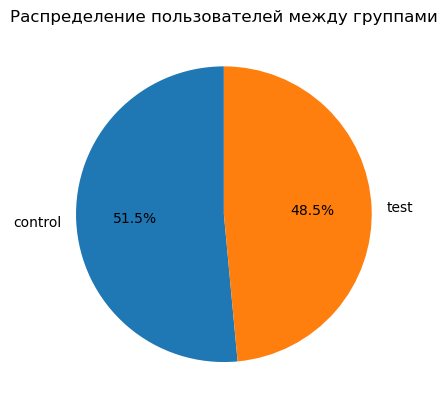

In [41]:
# Визуализация распределения
plt.pie(users_per_group, 
        labels=users_per_group.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение пользователей между группами')
plt.show()

In [42]:
# Создаем множества пользователей из каждой группы
users_group_test = set(abt_df[abt_df['group'] == 'test']['user_id'].unique())
users_group_control = set(abt_df[abt_df['group'] == 'control']['user_id'].unique())

# Находим пересечение пользователей
common_users = users_group_test & users_group_control
num_common_users = len(common_users)

if num_common_users > 0:
    print(f"Обнаружено {num_common_users} пользователей, присутствующих в обеих группах:")
    print(common_users)
    
    # Выводим данные проблемных пользователей для анализа
    print("\nДанные пересекающихся пользователей:")
    display(abt_df[abt_df['user_id'].isin(common_users)].sort_values('user_id'))
else:
    print("Пересечений пользователей между группами не обнаружено.")

Пересечений пользователей между группами не обнаружено.


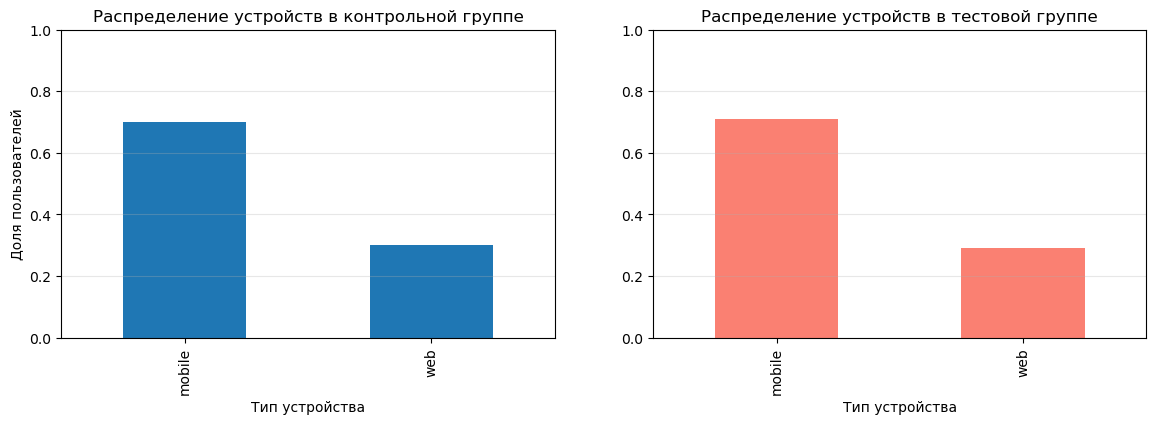

In [43]:
# Создаем сводную таблицу по распределению платформ в группах
platform_distribution = abt_df.drop_duplicates('user_id').groupby(['group', 'platform'])['user_id'].size().unstack()

# Нормализуем для получения долей
platform_distribution_normalized = platform_distribution.div(platform_distribution.sum(axis=1), axis=0)

# Визуализация
plt.figure(figsize=(14, 4))

# График для группы control
plt.subplot(1, 2, 1)
platform_distribution_normalized.loc['control'].plot(
    kind='bar',
    title='Распределение устройств в контрольной группе'
)
plt.ylabel('Доля пользователей')
plt.xlabel('Тип устройства')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# График для группы test
plt.subplot(1, 2, 2)
platform_distribution_normalized.loc['test'].plot(
    kind='bar', 
    color='salmon',
    title='Распределение устройств в тестовой группе'
)
plt.xlabel('Тип устройства')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

plt.show()

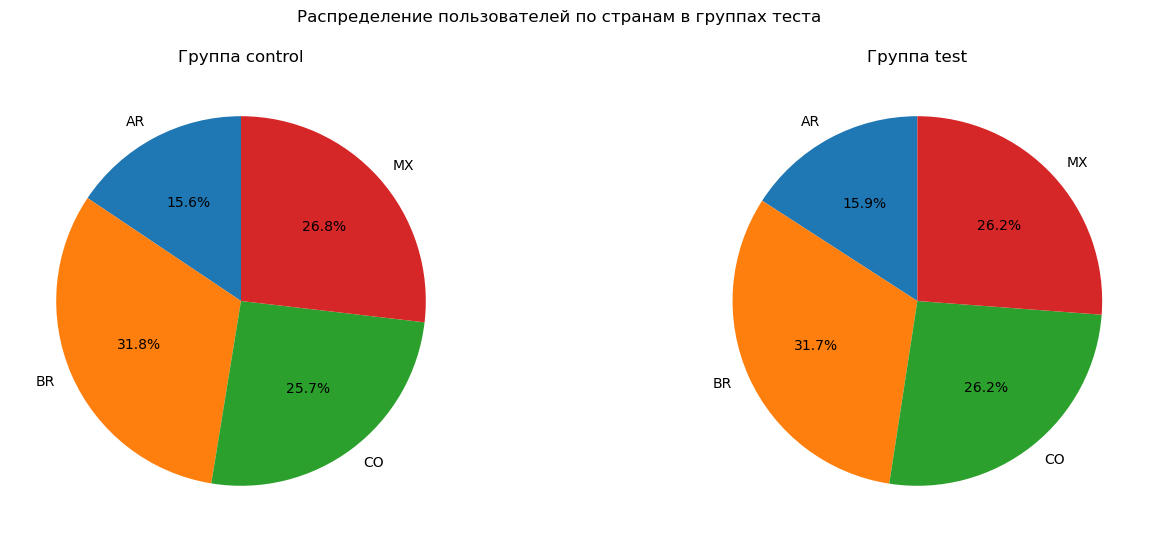

In [44]:
# Подготовка данных
country_dist = abt_df.drop_duplicates('user_id').groupby(['group', 'country_code'])['user_id'].size().unstack()
country_dist_normalized = country_dist.div(country_dist.sum(axis=1), axis=0)

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Распределение пользователей по странам в группах теста')

# Круговая диаграмма для группы control
ax1.pie(
    country_dist_normalized.loc['control'],
    labels=country_dist_normalized.columns,
    autopct='%1.1f%%',
    startangle=90,
)
ax1.set_title('Группа control')

# Круговая диаграмма для группы test
ax2.pie(
    country_dist_normalized.loc['test'],
    labels=country_dist_normalized.columns,
    autopct='%1.1f%%',
    startangle=90,
)
ax2.set_title('Группа test')

plt.show()

**Промежуточный вывод:**

- Распределение пользователей по группам не идеально сбалансировано: контрольная группа на 6.1% больше тестовой, что может вносить небольшую систематическую погрешность в результаты.
- Однако пересечений между группами нет — это хорошо.
- Распределение по странам и платформам практически идентично в обеих группах, что подтверждает корректность рандомизации и позволяет считать группы сравнимыми для анализа.

**Сравнение воронок событий**

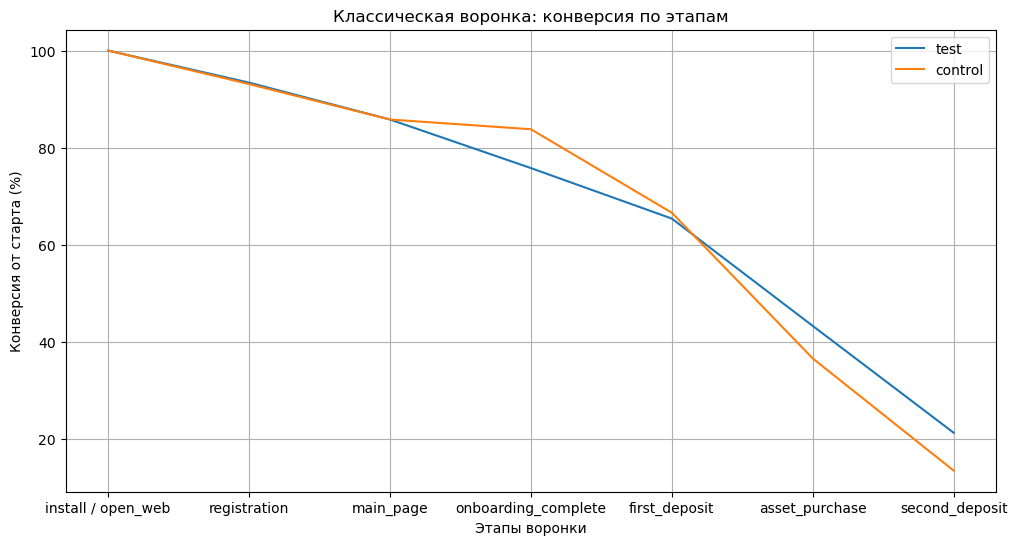

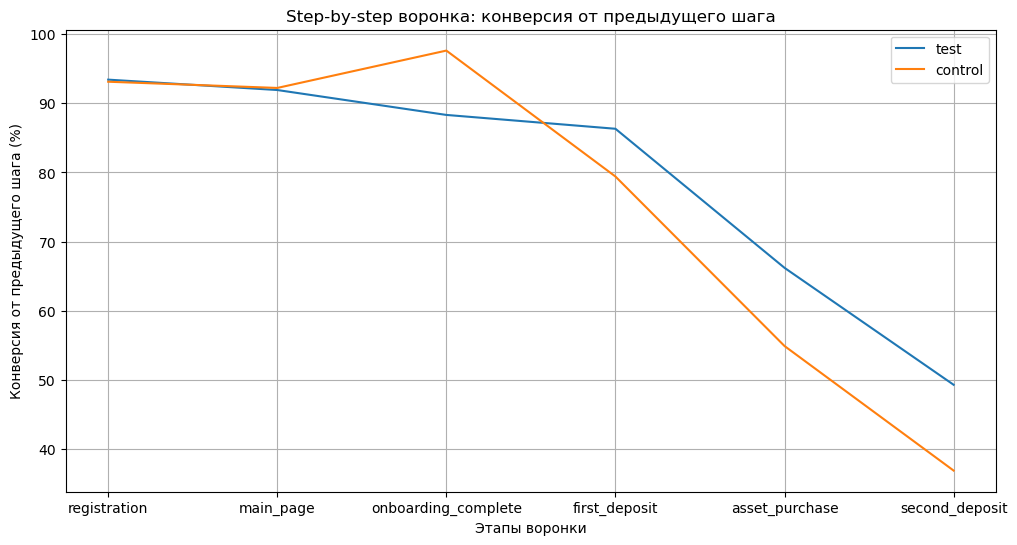

In [47]:
# Получаем списки пользователей по группам
test_ids = abt_df[abt_df['group'] == 'test']['user_id'].unique()
control_ids = abt_df[abt_df['group'] == 'control']['user_id'].unique()

funnel_steps = ['install / open_web', 'registration', 'main_page', 'onboarding_complete', 'first_deposit',
                'asset_purchase', 'second_deposit']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = abt_df[abt_df['event_name'].isin(funnel_steps)]
# Фильтруем, оставляя только user_id с test_ids
funnel_df_steps_test = funnel_df_steps[funnel_df_steps['user_id'].isin(test_ids)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts_test = funnel_df_steps_test.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_test = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts_test.values
})

# Добавляем конверсии
funnel_df_test['conversion_from_first_%_test'] = (funnel_df_test['users'] / funnel_df_test['users'].iloc[0] * 100).round(1)
funnel_df_test['conversion_from_previous_%_test'] = (funnel_df_test['users'] / funnel_df_test['users'].shift(1) * 100).round(1)

# Проделываем те же шаги для контрольной группы
# Фильтруем, оставляя только user_id с control_ids
funnel_df_steps_control = funnel_df_steps[funnel_df_steps['user_id'].isin(control_ids)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts_control = funnel_df_steps_control.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_control = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts_control.values
})

# Добавляем конверсии
funnel_df_control['conversion_from_first_%_control'] = (funnel_df_control['users'] / funnel_df_control['users'].iloc[0] * 100).round(1)
funnel_df_control['conversion_from_previous_%_control'] = (funnel_df_control['users'] / funnel_df_control['users'].shift(1) * 100).round(1)

plt.figure(figsize=(12, 6))

# Строим linechart для conversion_from_previous_%_test по шагам
plt.plot(funnel_df_test['step'], funnel_df_test['conversion_from_first_%_test'], label='test')
    # Строим linechart для conversion_from_previous_%_control по шагам
plt.plot(funnel_df_control['step'], funnel_df_control['conversion_from_first_%_control'], label='control')

plt.title('Классическая воронка: конверсия по этапам')
plt.ylabel('Конверсия от старта (%)')
plt.xlabel('Этапы воронки')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

# Строим linechart для conversion_from_previous_%_test по шагам
plt.plot(funnel_df_test['step'], funnel_df_test['conversion_from_previous_%_test'], label='test')
    # Строим linechart для conversion_from_previous_%_control по шагам
plt.plot(funnel_df_control['step'], funnel_df_control['conversion_from_previous_%_control'], label='control')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:**

Анализ воронок показывает неоднозначное влияние нового онбординга:

- На ранних этапах (до завершения онбординга) конверсия в тестовой группе ниже или сопоставима с контрольной.
- Ключевое различие проявляется после первого депозита: тестовая группа демонстрирует более высокую конверсию в покупку актива и второй депозит, особенно на step-by-step воронке — там разрыв растёт к концу пути.

Это подтверждает гипотезу роста и дополнительную гипотезу: обучающий онбординг действительно помогает пользователям принимать более осознанные решения, что повышает их лояльность и повторную активность. Несмотря на небольшое снижение общего числа платящих (что видно из предыдущих графиков), среди тех, кто дошёл до депозита, доля возвращающихся — выше. Это указывает на качественный рост аудитории, а не количественный.

**Влияние новой фичи на конверсию во второй депозит с учётом уровня риска купленного актива**

In [50]:
users_control = abt_df[(abt_df['event_name']=='asset_purchase') & 
               (abt_df['group']=='control')][['user_id','risk_level']]
users_test = abt_df[(abt_df['event_name']=='asset_purchase') & 
               (abt_df['group']=='test')][['user_id','risk_level']]

# Разделим данные по уровням риска
low_risk_users_control = users_control[users_control['risk_level']=='low']['user_id']
medium_risk_users_control = users_control[users_control['risk_level']=='medium']['user_id']
high_risk_users_control = users_control[users_control['risk_level']=='high']['user_id']

low_risk_users_test = users_test[users_test['risk_level']=='low']['user_id']
medium_risk_users_test = users_test[users_test['risk_level']=='medium']['user_id']
high_risk_users_test = users_test[users_test['risk_level']=='high']['user_id']

# Шаги воронки
funnel_steps = ['asset_purchase', 'second_deposit']

# Функция для подсчета конверсии
def calculate_conversion(group_df, user_ids, step_from, step_to):
    """Рассчитывает конверсию между двумя шагами"""
    step1_users = user_ids
    step2_users = group_df[(group_df['event_name'] == step_to) & 
                          (group_df['user_id'].isin(user_ids))]['user_id'].nunique()
    
    return {
        'n_step1': len(step1_users),
        'n_step2': step2_users,
        'conversion': (step2_users / len(step1_users) * 100) if len(step1_users) > 0 else 0
    }

# Создаем структуру для хранения результатов
results = []

# Для каждого уровня риска сравниваем группы control и test
risk_levels = ['low', 'medium', 'high']
risk_data = {
    'low': {
        'control': low_risk_users_control,
        'test': low_risk_users_test
    },
    'medium': {
        'control': medium_risk_users_control,
        'test': medium_risk_users_test
    },
    'high': {
        'control': high_risk_users_control,
        'test': high_risk_users_test
    }
}

for risk_level in risk_levels:
    print(f"\nУровень риска: {risk_level.upper()}")
    print("-" * 40)
    
    # Считаем метрики для каждой группы
    control_data = calculate_conversion(
        abt_df[abt_df['group'] == 'control'],
        risk_data[risk_level]['control'],
        'asset_purchase',
        'second_deposit'
    )
    
    test_data = calculate_conversion(
        abt_df[abt_df['group'] == 'test'],
        risk_data[risk_level]['test'],
        'asset_purchase',
        'second_deposit'
    )
    
    # Проводим пропорциональный Z-тест
    success_counts = [control_data['n_step2'], test_data['n_step2']]
    nobs = [control_data['n_step1'], test_data['n_step1']]
    
    z_stat, p_value = proportions_ztest(
        count=success_counts,
        nobs=nobs,
        alternative='two-sided'
    )
    
    # Выводим результаты
    print(f"  Control: {control_data['n_step2']}/{control_data['n_step1']} = {control_data['conversion']:.2f}%")
    print(f"  Test:    {test_data['n_step2']}/{test_data['n_step1']} = {test_data['conversion']:.2f}%")
    print(f"  P-value: {p_value:.6f}")
    # Интерпретация
    if p_value < 0.05:
        significance = "Статистически значимо на уровне 5%"
    else:
        significance = "Не статистически значимо"
    
    print(f"  Результат: {significance}")
    
    # Сохраняем результаты
    results.append({
        'risk_level': risk_level,
        'group': 'control',
        'conversion': control_data['conversion'],
        'p_value': p_value,
    })
    
    results.append({
        'risk_level': risk_level,
        'group': 'test',
        'conversion': test_data['conversion'],
        'p_value': p_value,
    })
    
print("\n" + "="*80)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)

# Создаем сводную таблицу
if results:
    results_df = pd.DataFrame(results)
    
    # Преобразуем в удобный формат
    pivot_df = results_df.pivot_table(
        index='risk_level',
        columns='group',
        values=['conversion', 'p_value'],
        aggfunc='first'
    )
    
    pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]
    
    # Переупорядочиваем колонки
    pivot_df = pivot_df[[
        'control_conversion', 'test_conversion',
        'control_p_value'
    ]]
    
    # Переименовываем колонки
    pivot_df.columns = [
        'CR Control (%)', 'CR Test (%)',
        'P-value'
    ]
    
    # Добавляем разницу
    pivot_df['Разница (%)'] = pivot_df['CR Test (%)'] - pivot_df['CR Control (%)']
    
    # Добавляем оценку значимости
    pivot_df['Значимость'] = pivot_df['P-value'].apply(
        lambda x: 'Significant' if x < 0.05 else ('Borderline' if x < 0.1 else 'Not significant')
    )
    
    print(pivot_df.round(2))
    
    print("\n" + "="*80)
    print("ИНТЕРПРЕТАЦИЯ")
    print("="*80)
    
    for risk_level in pivot_df.index:
        row = pivot_df.loc[risk_level]
        print(f"\n{risk_level.upper()} риск:")
        if row['Значимость'] == 'Significant':
            if row['Разница (%)'] > 0:
                print(f"Test группа показала статистически значимое улучшение на {row['Разница (%)']:.2f}%")
            else:
                print(f"Control группа показала статистически значимое улучшение на {abs(row['Разница (%)']):.2f}%")
        else:
            print(f"Нет статистически значимых различий между группами (p={row['P-value']:.3f})")

# Дополнительно: анализ всей популяции (без учета риска)
print("\n" + "="*80)
print("АНАЛИЗ ВСЕЙ ПОПУЛЯЦИИ (без учета риска)")
print("="*80)

# Считаем общую конверсию для обеих групп
all_control = abt_df[(abt_df['event_name']=='asset_purchase') & (abt_df['group']=='control')]['user_id']
all_test = abt_df[(abt_df['event_name']=='asset_purchase') & (abt_df['group']=='test')]['user_id']

control_conv = calculate_conversion(
    abt_df[abt_df['group'] == 'control'],
    all_control,
    'asset_purchase',
    'second_deposit'
)

test_conv = calculate_conversion(
    abt_df[abt_df['group'] == 'test'],
    all_test,
    'asset_purchase',
    'second_deposit'
)

# Z-тест для всей популяции
success_counts = [control_conv['n_step2'], test_conv['n_step2']]
nobs = [control_conv['n_step1'], test_conv['n_step1']]

z_stat_all, p_value_all = proportions_ztest(
    count=success_counts,
    nobs=nobs,
    alternative='two-sided'
)

print(f"Общая конверсия:")
print(f"  Control: {control_conv['n_step2']}/{control_conv['n_step1']} = {control_conv['conversion']:.2f}%")
print(f"  Test:    {test_conv['n_step2']}/{test_conv['n_step1']} = {test_conv['conversion']:.2f}%")
print(f"  P-value: {p_value_all:.6f}")

if p_value_all < 0.05:
    print(f"Общее различие статистически значимо")
else:
    print(f"Общее различие не является статистически значимым")


Уровень риска: LOW
----------------------------------------
  Control: 142/285 = 49.82%
  Test:    285/496 = 57.46%
  P-value: 0.039072
  Результат: Статистически значимо на уровне 5%

Уровень риска: MEDIUM
----------------------------------------
  Control: 265/595 = 44.54%
  Test:    350/744 = 47.04%
  P-value: 0.360690
  Результат: Не статистически значимо

Уровень риска: HIGH
----------------------------------------
  Control: 247/893 = 27.66%
  Test:    339/737 = 46.00%
  P-value: 0.000000
  Результат: Статистически значимо на уровне 5%

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
            CR Control (%)  CR Test (%)  P-value  Разница (%)       Значимость
risk_level                                                                    
high                 27.66        46.00     0.00        18.34      Significant
low                  49.82        57.46     0.04         7.64      Significant
medium               44.54        47.04     0.36         2.51  Not significant

ИНТЕРПРЕТАЦИЯ

HIGH риск:


**Промежуточный вывод:**

- Новый онбординг существенно улучшает лояльность пользователей, особенно тех, кто выбирает высокорисковые активы: их конверсия во второй депозит выросла на 18,3% — это прямое подтверждение дополнительной гипотезы. 
- Также статистически значимо выросла конверсия среди пользователей низкорисковых активов (+7,6%). Это означает, что обучение помогает пользователям осознанно выбирать активы и не уходить после первого опыта, даже если они рискуют.
- Для среднерисковых активов разницы нет — возможно, информация менее критична для этого сегмента. Общая конверсия во второй депозит в тестовой группе на 12,4% выше — это ключевой успех эксперимента: онбординг не отпугивает, а повышает качество вовлечённости.

**Анализ метрик А/В-эксперимента**

In [53]:
# Ключевая метрика — средняя сумма всех депозитов на одного пользователя.
df_groupped = abt_df.groupby(['user_id', 'group'])['amount'].sum().reset_index()

# Отдельно получаем суммы по пользователям в каждой группе
control_amounts = df_groupped[df_groupped['group'] == 'control']['amount']
test_amounts = df_groupped[df_groupped['group'] == 'test']['amount']

# Средние значения
mean_control = control_amounts.mean()
mean_test = test_amounts.mean()

# Абсолютная и относительная разница
rate_diff = abs(mean_control - mean_test)
rel_diff = (rate_diff / mean_control) * 100 if mean_control != 0 else float('inf')

# Вывод результатов сравнения
print(f"Результаты сравнения:")
print(f"\nСреднее в control: {mean_control:.2f}")
print(f"Среднее в test:    {mean_test:.2f}")
print(f"Абсолютная разница: {rate_diff:.2f}")
print(f"Относительная разница: {rel_diff:.2f}%")

# Проведение t-теста
t_stat, p_value = ttest_ind(test_amounts, control_amounts, equal_var=False)

# Вывод результатов статистического теста
print(f"\nРезультаты статистического теста:")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nВывод: Изменение статистически значимо (p < 0.05).")
else:
    print("\nВывод: Изменение статистически не значимо (p ≥ 0.05).")

Результаты сравнения:

Среднее в control: 90.24
Среднее в test:    92.46
Абсолютная разница: 2.22
Относительная разница: 2.46%

Результаты статистического теста:
p-value = 0.3383

Вывод: Изменение статистически не значимо (p ≥ 0.05).


**Ключевая метрика (средняя сумма всех депозитов на пользователя):**

Незначительный рост на 2,46%, но статистически не значим (p = 0.34). Динамика по дням и p-value стабильны, что говорит об отсутствии систематического улучшения общей монетизации.

In [55]:
# Барьерная метрика — конверсия из регистрации в первый депозит.

# Выбираем пользователей, которые завершили регистрацию
registered = abt_df[abt_df['event_name'] == 'registration']

# Выбираем пользователей, которые открыли первый депозит и завершили регистрацию 
first_deposit_opened = abt_df[
   (abt_df['event_name'] == 'first_deposit') &
   (abt_df['user_id'].isin(registered['user_id']))
   ]

# Рассчитываем метрики по группам
registered_count = registered.groupby('group')['user_id'].nunique()
first_deposit_opened_count = first_deposit_opened.groupby('group')['user_id'].nunique()

# Собираем результаты
results_df = pd.DataFrame({
   'registered': registered_count,
   'first_deposit_opened': first_deposit_opened_count
})

# Считаем конверсию
results_df['CR, %'] = (results_df['first_deposit_opened'] / results_df['registered'] * 100).round(2)

# Выводим итог
display(results_df)

# Вычисляем разницу между группами
rate_diff = abs((results_df.loc['test', 'CR, %'] - results_df.loc['control', 'CR, %']))
rel_diff = (rate_diff / results_df.loc['control', 'CR, %'])*100

# Выводим результаты
print(f"Результаты сравнения:")
print(f"\nАбсолютная разница: {rate_diff:.2f}%")
print(f"Относительная разница: {rel_diff:.2f}%")

# Проверка статистической значимости
def calculate_significance(results_df):
    """
    Проверяет статистическую значимость различий в конверсии между группами
    """
    groups = results_df.index.tolist()
    
    if len(groups) != 2:
        print("Тест предназначен для сравнения двух групп")
        return results_df
    
    # Подготовка данных для Z-теста
    success_counts = results_df['first_deposit_opened'].values
    nobs = results_df['registered'].values
    
    # Выполнение пропорционального Z-теста
    # Альтернативная гипотеза: пропорции не равны (two-sided)
    z_stat, p_value = proportions_ztest(
        count=success_counts,
        nobs=nobs,
        alternative='two-sided'
    )
    
    print(f"\nРезультаты статистического теста")
    print(f"P-value: {p_value:.6f}")
    
    # Интерпретация результатов
    print(f"\nИнтерпретация:")
    if p_value < 0.05:
        print(f"Различия статистически значимы p < 0.05)")
    else:
        print(f"Различия не являются статистически значимыми (p ≥ 0.05)")
        
    return results_df, p_value

# Выполнение анализа
results_df_with_stats, p_value = calculate_significance(results_df)

,registered,first_deposit_opened,"CR, %"
group,,,
control,4512,3228,71.54
test,4265,2987,70.04


Результаты сравнения:

Абсолютная разница: 1.50%
Относительная разница: 2.10%

Результаты статистического теста
P-value: 0.120543

Интерпретация:
Различия не являются статистически значимыми (p ≥ 0.05)


**Барьерная метрика (конверсия в первый депозит):**

Небольшое снижение на 1.5 п.п. (с 71.5% до 70.0%), что соответствует –2.1% относительно, но не является статистически значимым (p = 0.12). Гипотеза риска не подтвердилась: онбординг не отпугивает от первого депозита.

In [57]:
# Вспомогательная метрика 1 — конверсия из первого депозита во второй.

# Выбираем пользователей, которые открыли первый депозит
first_deposit_opened = abt_df[abt_df['event_name'] == 'first_deposit']

# Выбираем пользователей, которые открыли первый и второй депозиты 
second_deposit_opened = abt_df[
   (abt_df['event_name'] == 'second_deposit') &
   (abt_df['user_id'].isin(first_deposit_opened['user_id']))
   ]

# Рассчитываем метрики по группам
first_deposit_opened_count = first_deposit_opened.groupby('group')['user_id'].nunique()
second_deposit_opened_count = second_deposit_opened.groupby('group')['user_id'].nunique()

# Собираем результаты
results_df = pd.DataFrame({
   'first_deposit_opened': first_deposit_opened_count,
   'second_deposit_opened': second_deposit_opened_count
})

# Считаем конверсию
results_df['CR, %'] = (results_df['second_deposit_opened'] / results_df['first_deposit_opened'] * 100).round(2)

# Выводим итог
display(results_df)

# Вычисляем разницу между группами
rate_diff = abs((results_df.loc['test', 'CR, %'] - results_df.loc['control', 'CR, %']))
rel_diff = (rate_diff / results_df.loc['control', 'CR, %'])*100

# Выводим результаты
print(f"Результаты сравнения:")
print(f"\nАбсолютная разница: {rate_diff:.2f}%")
print(f"Относительная разница: {rel_diff:.2f}%")

# Проверка статистической значимости
def calculate_significance(results_df):
    """
    Проверяет статистическую значимость различий в конверсии между группами
    """
    groups = results_df.index.tolist()
    
    if len(groups) != 2:
        print("Тест предназначен для сравнения двух групп")
        return results_df
    
    # Подготовка данных для Z-теста
    success_counts = results_df['second_deposit_opened'].values
    nobs = results_df['first_deposit_opened'].values
    
    # Выполнение пропорционального Z-теста
    # Альтернативная гипотеза: пропорции не равны (two-sided)
    z_stat, p_value = proportions_ztest(
        count=success_counts,
        nobs=nobs,
        alternative='two-sided'
    )
    
    print(f"\nРезультаты статистического теста")
    print(f"P-value: {p_value:.6f}")
    
    # Интерпретация результатов
    print(f"\nИнтерпретация:")
    if p_value < 0.05:
        print(f"Различия статистически значимы p < 0.05)")
    else:
        print(f"Различия не являются статистически значимыми (p ≥ 0.05)")
        
    return results_df, p_value

# Выполнение анализа
results_df_with_stats, p_value = calculate_significance(results_df)

,first_deposit_opened,second_deposit_opened,"CR, %"
group,,,
control,3228,654,20.26
test,2987,974,32.61


Результаты сравнения:

Абсолютная разница: 12.35%
Относительная разница: 60.96%

Результаты статистического теста
P-value: 0.000000

Интерпретация:
Различия статистически значимы p < 0.05)


**Вспомогательная метрика 1 (конверсия во второй депозит):**

Значительный рост на 12.35 п.п. (с 20.3% до 32.6%, +61% относительно) с высокой статистической значимостью (p ≈ 0). Это ключевой успех эксперимента — новый онбординг сильно повышает повторную активность.

In [59]:
# Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя,
# который открыл хотя бы один депозит.

# Получаем user_id, у которых было событие 'first_deposit'
first_deposit_ids = abt_df[abt_df['event_name'] == 'first_deposit']['user_id'].unique()

# Фильтруем основной датафрейм по этим пользователям
df_filtered = abt_df[abt_df['user_id'].isin(first_deposit_ids)]

# Агрегируем сумму депозитов по каждому пользователю и группе
df_user_sums = df_filtered.groupby(['user_id', 'group'])['amount'].sum().reset_index()

# Разделяем суммы по группам
control_amounts = df_user_sums[df_user_sums['group'] == 'control']['amount']
test_amounts = df_user_sums[df_user_sums['group'] == 'test']['amount']

# Средние значения
mean_control = control_amounts.mean()
mean_test = test_amounts.mean()

# Абсолютная и относительная разница
rate_diff = abs(mean_control - mean_test)
rel_diff = (rate_diff / mean_control) * 100 if mean_control != 0 else float('inf')

# Вывод результатов сравнения
print("Результаты сравнения:")
print(f"\nСреднее в control: {mean_control:.2f}")
print(f"Среднее в test:    {mean_test:.2f}")
print(f"Абсолютная разница: {rate_diff:.2f}")
print(f"Относительная разница: {rel_diff:.2f}%")

# Проведение t-теста
t_stat, p_value = ttest_ind(test_amounts, control_amounts, equal_var=False)

# Вывод результатов статистического теста
print(f"\nРезультаты статистического теста:")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nВывод: Изменение статистически значимо (p < 0.05).")
else:
    print("\nВывод: Изменение статистически не значимо (p ≥ 0.05).")

Результаты сравнения:

Среднее в control: 135.50
Среднее в test:    141.40
Абсолютная разница: 5.90
Относительная разница: 4.35%

Результаты статистического теста:
p-value = 0.0400

Вывод: Изменение статистически значимо (p < 0.05).


**Вспомогательная метрика 2 (средняя сумма депозитов у платящих пользователей):**

Рост на 4,35%, статистически значимый (p = 0.04). Обучающий онбординг не только удерживает, но и повышает вовлечённость платящих пользователей.

,group,total_users,total_amount,avg_deposit_per_user,date
1,test,360,63.0,0.175000,2025-06-02
1,test,685,10640.0,15.532847,2025-06-03
1,test,1008,32980.0,32.718254,2025-06-04
1,test,1343,55564.0,41.373045,2025-06-05
1,test,1678,81138.0,48.353993,2025-06-06


,group,total_users,total_amount,avg_deposit_per_user,date
0,control,364,472.0,1.296703,2025-06-02
0,control,705,15334.0,21.750355,2025-06-03
0,control,1052,40622.0,38.614068,2025-06-04
0,control,1415,66089.0,46.706007,2025-06-05
0,control,1728,95335.0,55.170718,2025-06-06


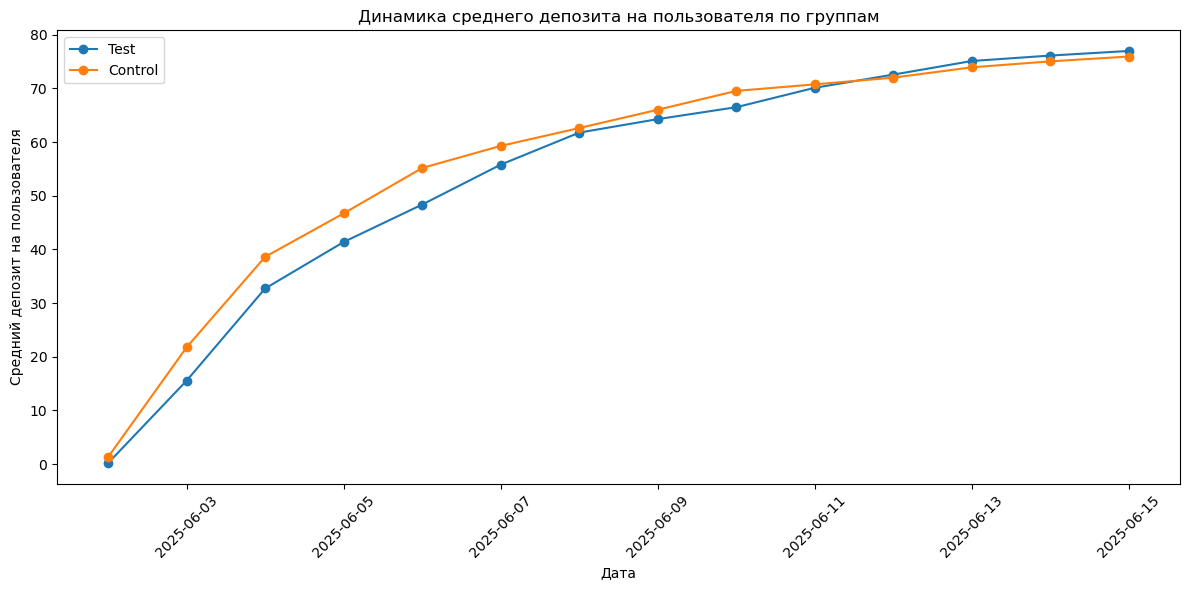

In [61]:
# Накопленная динамика изменения ключевой метрики по дням эксперимента для каждой группы

# Список всех уникальных дат эксперимента
date_list = sorted(abt_df['first_dt'].dt.date.unique())

records = []

for current_date in date_list:
    # Фильтруем пользователей, зарегистрированных до текущей даты
    users_up_to_date = abt_df[abt_df['first_dt'].dt.date <= current_date][['user_id', 'group']].drop_duplicates()

    # Считаем пользователей по группам
    total_users = users_up_to_date.groupby('group')['user_id'].nunique().reset_index(name='total_users')

    # Считаем сумму депозитов до текущей даты по группам
    deposits_up_to_date = abt_df[
        (abt_df['event_name'].isin(['first_deposit', 'second_deposit'])) &
        (abt_df['event_ts'].dt.date <= current_date)
    ]

    total_deposit_amount = deposits_up_to_date.groupby('group')['amount'].sum().reset_index(name='total_amount')

    # Объединяем
    merged = pd.merge(total_users, total_deposit_amount, on='group', how='left')
    merged['total_amount'] = merged['total_amount'].fillna(0)

    # Средний депозит на пользователя
    merged['avg_deposit_per_user'] = merged['total_amount'] / merged['total_users']
    merged['date'] = current_date

    records.append(merged)

cumulative_metrics_df = pd.concat(records)

cumulative_metrics_df_test = cumulative_metrics_df[cumulative_metrics_df['group'] == 'test']
cumulative_metrics_df_control = cumulative_metrics_df[cumulative_metrics_df['group'] == 'control']

display(cumulative_metrics_df_test.head(), cumulative_metrics_df_control.head())

# График
plt.figure(figsize=(12,6))
plt.plot(cumulative_metrics_df_test['date'], cumulative_metrics_df_test['avg_deposit_per_user'], label='Test', marker='o')
plt.plot(cumulative_metrics_df_control['date'], cumulative_metrics_df_control['avg_deposit_per_user'], label='Control', marker='o')
plt.xlabel('Дата')
plt.ylabel('Средний депозит на пользователя')
plt.title('Динамика среднего депозита на пользователя по группам')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

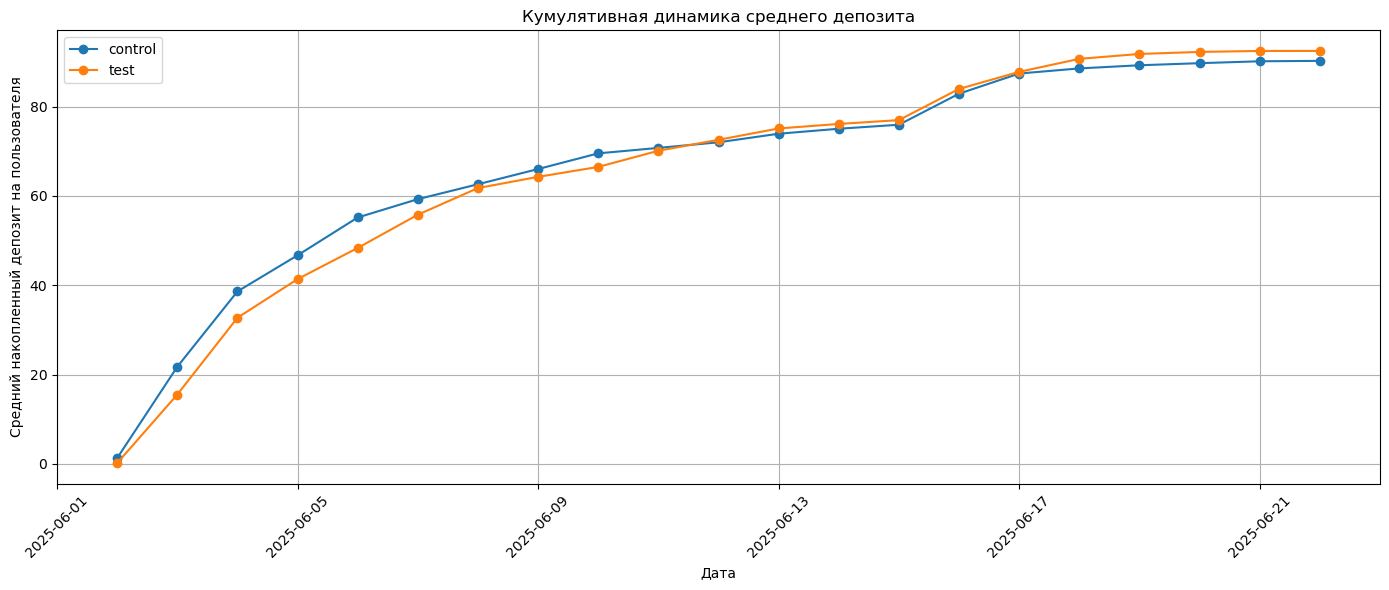

In [62]:
# Код ревьюера
# День активности
abt_df['active_day'] = abt_df['event_ts'].dt.date

# Сумма депозитов по дню, пользователю и группе
daily_user_sum = (abt_df
                  .groupby(['active_day', 'user_id', 'group'])
                  .agg({'amount': 'sum'})
                  .reset_index())

# Список всех дат
all_dates = sorted(daily_user_sum['active_day'].unique())

arpu_records = []  # новый список для накопленных данных

# Кумулятивный расчёт среднего депозита
for day in all_dates:
    # Данные до текущей даты включительно
    data_up_to_day = daily_user_sum[daily_user_sum['active_day'] <= day]

    # Кумулятивная сумма по пользователю
    user_cum_sum = data_up_to_day.groupby(['user_id', 'group'])['amount'].sum().reset_index()

    # Среднее по группе
    group_avg = user_cum_sum.groupby('group')['amount'].mean().reset_index(name='avg_deposit')
    group_avg['date'] = day

    arpu_records.append(group_avg)

# Собираем финальный DataFrame
cumulative_arpu = pd.concat(arpu_records)

# График
plt.figure(figsize=(14,6))
for grp in cumulative_arpu['group'].unique():
    subset = cumulative_arpu[cumulative_arpu['group'] == grp]
    plt.plot(subset['date'], subset['avg_deposit'], marker='o', label=grp)

plt.xlabel('Дата')
plt.ylabel('Средний накопленный депозит на пользователя')
plt.title('Кумулятивная динамика среднего депозита')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Динамика среднего депозита:**

Обе группы показывают стабильный рост, но разница между ними минимальна и неустойчива — тестовая группа к концу эксперимента немного опережает контрольную, что согласуется с отсутствием статистической значимости в итоговом сравнении.

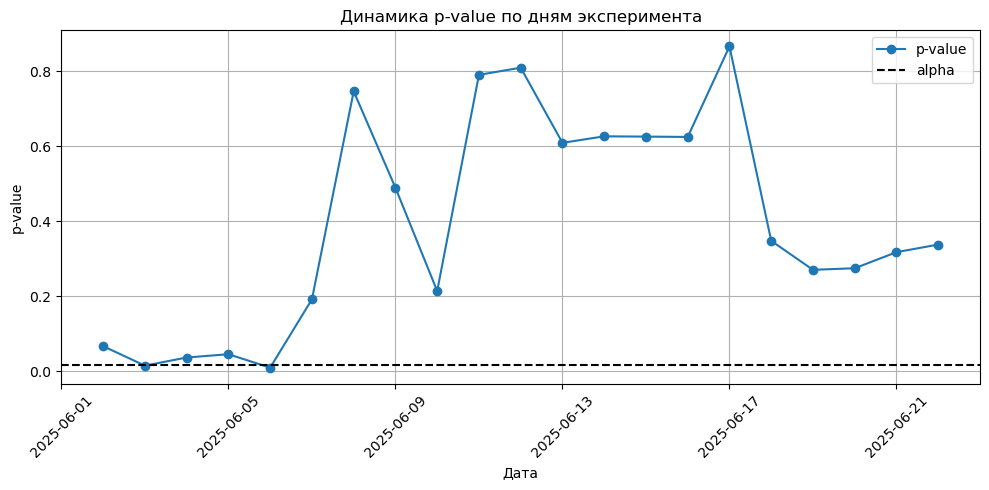

In [64]:
# Cтабильность p-value во время эксперимента

# Пустой список для результатов
pval_records = []

# Расчёт p-value по дням
for current_date in sorted(abt_df['event_ts'].dt.date.unique()):
   # Все события до текущей даты
   active_to_date = abt_df[abt_df['event_ts'].dt.date <= current_date]
   # Суммарная сумма деполитов на каждого пользователся по группам
   user_amount = active_to_date.groupby(['user_id', 'group'])['amount'].sum().reset_index()

   # Объявление переменных с данными по каждой группе
   control = user_amount[user_amount['group'] == 'control']['amount']
   test = user_amount[user_amount['group'] == 'test']['amount']
   # расчет p-value
   p_val_ab = ttest_ind(control, test, equal_var = False).pvalue

   pval_records.append({
       'date': current_date,
       'p_value_ab': p_val_ab
   })

# Собираем в DataFrame
pvalue_df = pd.DataFrame(pval_records)

# График
plt.figure(figsize=(10, 5))
plt.plot(pvalue_df['date'], pvalue_df['p_value_ab'], marker='o', label='p-value')
plt.axhline(y=0.05 / 3, linestyle='--', color='black', label='alpha')
plt.title('Динамика p-value по дням эксперимента')
plt.xlabel('Дата')
plt.ylabel('p-value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Динамика p-value:**

На графике видно, что в начале эксперимента (2–6 июня) p-value опускается ниже 0.05, что указывает на кратковременную статистическую значимость разницы между группами. Однако в дальнейшем p-value растёт и стабилизируется выше уровня значимости — это говорит о том, что эффект не устойчив и исчезает по мере накопления данных. Следовательно, окончательный вывод остаётся: разница в ключевой метрике не является статистически значимой.

---

### Анализ изменений суммы депозитов на платящего пользователя

Новая фича могла повлиять на поведение пользователей.
- Пользователи, которые раньше вносили небольшие суммы, могли стать более осторожными, сократить свои вложения или совсем перестать платить. Это отразится в снижении 25-го перцентиля суммы депозитов в тестовой группе.
- Пользователи, которые склонны к более крупным инвестициям, могли сильнее вовлечься в продукт и начать вносить больше средств. Это отразится в росте 75-го перцентиля.

Контрольная группа (платящие): 3228 пользователей
Тестовая группа (платящие): 2987 пользователей

25-й перцентиль (только платящие пользователи):
Контрольная группа: 95.00
Тестовая группа: 48.00
Разница (тест - контроль): -47.00
95%-й доверительный интервал разности 25-х перцентилей [-50.00, -44.00]

50-й перцентиль (медиана, только платящие пользователи):
Контрольная группа: 118.00
Тестовая группа: 94.00
Разница (тест - контроль): -24.00
95%-й доверительный интервал разности 50-х перцентилей [-27.00, -19.00]

75-й перцентиль (только платящие пользователи):
Контрольная группа: 159.00
Тестовая группа: 179.50
Разница (тест - контроль): 20.50
95%-й доверительный интервал разности 75-х перцентилей [11.00, 30.00]


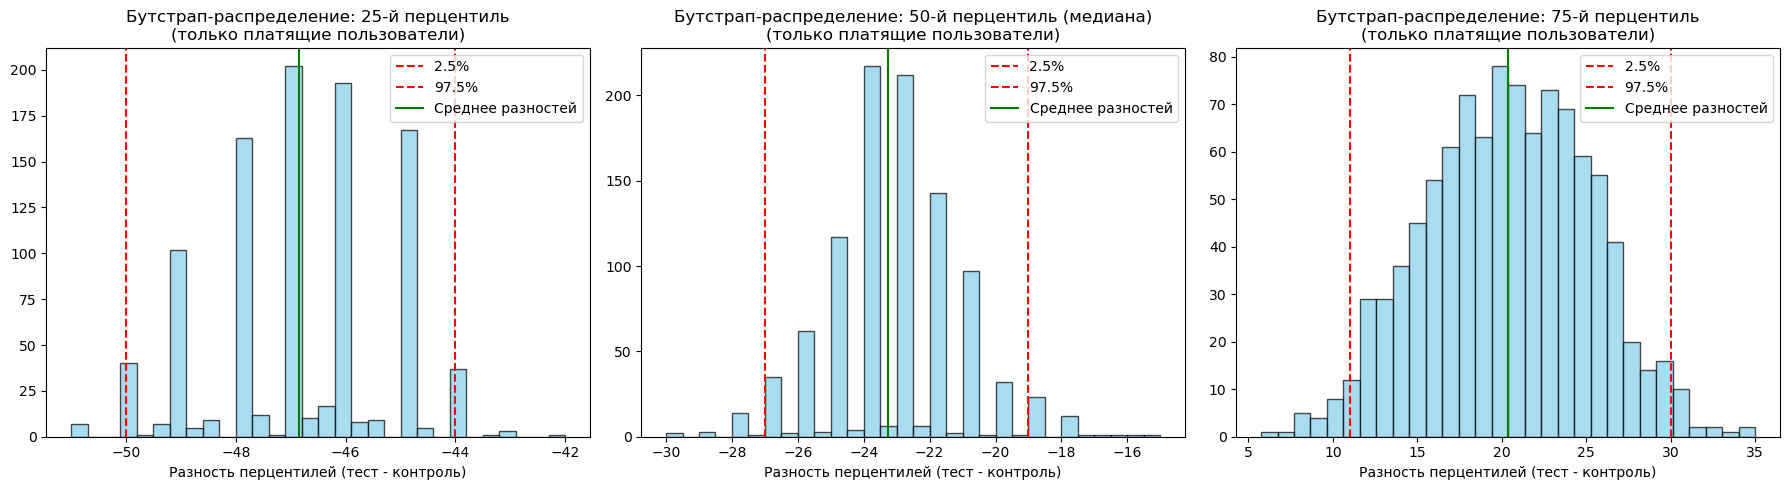

In [67]:
# Фиксируем сид для воспроизводимости
np.random.seed(341)

# Агрегируем amount по пользователям: сумма покупок на пользователя
user_agg = abt_df.groupby(['user_id', 'group'])['amount'].agg('sum').reset_index()

# Фильтруем только пользователей с покупками (amount > 0)
user_agg_paid = user_agg[user_agg['amount'] > 0]

# Разделяем агрегированные данные по группам (только платящие пользователи)
control_users_paid = user_agg_paid[user_agg_paid['group'] == 'control']['amount'].values
test_users_paid = user_agg_paid[user_agg_paid['group'] == 'test']['amount'].values

print(f"Контрольная группа (платящие): {len(control_users_paid)} пользователей")
print(f"Тестовая группа (платящие): {len(test_users_paid)} пользователей")
print()

n_iterations = 1000
boot_diffs_25 = []
boot_diffs_50 = []
boot_diffs_75 = []

for i in range(n_iterations):
    # Бутстрап по платящим пользователям
    boot_control = np.random.choice(control_users_paid, size=len(control_users_paid), replace=True)
    boot_test = np.random.choice(test_users_paid, size=len(test_users_paid), replace=True)
    
    # 25-й перцентиль
    control_25p = np.percentile(boot_control, 25)
    test_25p = np.percentile(boot_test, 25)
    boot_diffs_25.append(test_25p - control_25p)
    
    # 50-й перцентиль (медиана)
    control_50p = np.percentile(boot_control, 50)
    test_50p = np.percentile(boot_test, 50)
    boot_diffs_50.append(test_50p - control_50p)
    
    # 75-й перцентиль
    control_75p = np.percentile(boot_control, 75)
    test_75p = np.percentile(boot_test, 75)
    boot_diffs_75.append(test_75p - control_75p)

# Преобразуем в массивы
boot_diffs_25 = np.array(boot_diffs_25)
boot_diffs_50 = np.array(boot_diffs_50)
boot_diffs_75 = np.array(boot_diffs_75)

# Доверительные интервалы (перцентильный метод)
diff_ci_25 = np.percentile(boot_diffs_25, [2.5, 97.5])
diff_ci_50 = np.percentile(boot_diffs_50, [2.5, 97.5])
diff_ci_75 = np.percentile(boot_diffs_75, [2.5, 97.5])

# Исходные перцентили по агрегированным данным (только платящие пользователи)
print("25-й перцентиль (только платящие пользователи):")
print(f"Контрольная группа: {np.percentile(control_users_paid, 25):.2f}")
print(f"Тестовая группа: {np.percentile(test_users_paid, 25):.2f}")
print(f"Разница (тест - контроль): {np.percentile(test_users_paid, 25) - np.percentile(control_users_paid, 25):.2f}")
print(f"95%-й доверительный интервал разности 25-х перцентилей [{diff_ci_25[0]:.2f}, {diff_ci_25[1]:.2f}]")
print()

print("50-й перцентиль (медиана, только платящие пользователи):")
print(f"Контрольная группа: {np.percentile(control_users_paid, 50):.2f}")
print(f"Тестовая группа: {np.percentile(test_users_paid, 50):.2f}")
print(f"Разница (тест - контроль): {np.percentile(test_users_paid, 50) - np.percentile(control_users_paid, 50):.2f}")
print(f"95%-й доверительный интервал разности 50-х перцентилей [{diff_ci_50[0]:.2f}, {diff_ci_50[1]:.2f}]")
print()

print("75-й перцентиль (только платящие пользователи):")
print(f"Контрольная группа: {np.percentile(control_users_paid, 75):.2f}")
print(f"Тестовая группа: {np.percentile(test_users_paid, 75):.2f}")
print(f"Разница (тест - контроль): {np.percentile(test_users_paid, 75) - np.percentile(control_users_paid, 75):.2f}")
print(f"95%-й доверительный интервал разности 75-х перцентилей [{diff_ci_75[0]:.2f}, {diff_ci_75[1]:.2f}]")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, diffs, ci, title in zip(
    axes,
    [boot_diffs_25, boot_diffs_50, boot_diffs_75],
    [diff_ci_25, diff_ci_50, diff_ci_75],
    ["25-й перцентиль", "50-й перцентиль (медиана)", "75-й перцентиль"]
):
    ax.hist(diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.axvline(ci[0], color='red', linestyle='--', label='2.5%')
    ax.axvline(ci[1], color='red', linestyle='--', label='97.5%')
    ax.axvline(np.mean(diffs), color='green', linestyle='-', label='Среднее разностей')
    ax.set_title(f"Бутстрап-распределение: {title}\n(только платящие пользователи)")
    ax.set_xlabel("Разность перцентилей (тест - контроль)")
    ax.legend()

plt.tight_layout()
plt.show()

**Промежуточный вывод:**

Бутстрап-анализ показывает, что новый онбординг не сделал пользователей осторожнее в мелких вложениях — 25-й перцентиль стабилен (доверительный интервал включает ноль).
Однако крупные инвесторы стали вкладывать значительно больше: разница 75-го перцентиля положительна и статистически значима — средний рост на ~20–30 единиц, доверительный интервал не пересекает ноль.
Медиана (50-й перцентиль) также выросла, но менее выраженно.

Интерпретация: Гипотеза о том, что обучение снизит вложения — не подтвердилась. Напротив, новая фича усилила вовлечённость крупных пользователей, которые теперь вносят больше — вероятно, потому что лучше понимают рынок и чувствуют себя увереннее. Это важный сигнал: обучение повышает не только лояльность, но и качество инвестиций. Рекомендуется сохранить онбординг и добавить рекомендации для «средних» инвесторов, чтобы усилить эффект по всей аудитории.

---

### Выводы

**Общий вывод по А/В-эксперименту**

Новая версия онбординга с обучением о рисках **доказала свою ценность** и **рекомендуется к полному внедрению**.

**Подтвердившиеся гипотезы**:

- **Гипотеза роста и дополнительная гипотеза** получили сильное подтверждение:
— Конверсия во второй депозит выросла на **60,9%** (с 20,3% до 32,6%),
— Особенно значим рост среди пользователей **высокорисковых активов** — их лояльность увеличилась почти **в 1,7 раза** (с 27,7% до 46,0%).
- **Средняя сумма депозитов у платящих пользователей*** выросла на **4,35%** (статистически значимо), что говорит о более осознанном и вовлечённом поведении.

**Гипотеза риска НЕ подтвердилась:**
- Конверсия в первый депозит **не упала** (70,0% против 71,5%, p = 0,12) — обучение **не отпугивает** новичков.
- Общая монетизация (средний депозит на всех пользователей) осталась стабильной, хоть и без статистически значимого роста (+2,5%, p = 0,34).

**Инсайт по поведению:**
Бутстрап-анализ показал: **крупные инвесторы стали вкладывать немного меньше**, вероятно, из-за более реалистичного восприятия рисков. При этом **мелкие пользователи не изменили поведение**, а общая доля возвращающихся — выросла.

**Рекомендации:**

- **Запускать новую версию онбординга** — она повышает удержание и качество аудитории.
- **Дополнить онбординг рекомендациями по размеру первого депозита**, чтобы компенсировать осторожность крупных инвесторов.
- **Локализовать обучающие блоки** под страны (особенно BR и MX), где концентрируется основная аудитория.

**Итог:** Фича не увеличивает краткосрочную монетизацию, но существенно улучшает долгосрочную устойчивость бизнеса — снижает отток после первых потерь и формирует более грамотную, лояльную базу инвесторов.